# Problem Statement

Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.


# Following actions should be performed:

* [1] Identify the output variable.
* [2] Understand the type of data.
* [3] Count how many null values are existing in columns. 
* [4] Remove null value rows of the target variable. 
* [5] Check if there is a house without a family head.
* [6] Check whether all members of the house have the same poverty level.
* [7] Set the poverty level of the members and the head of the house same in a family.
* [8] Check if there are any biases in your dataset.
* [9] Estimate the scores from the model using Cross Validation
* [10] Predict the accuracy using random forest classifier.
* [11] Check the accuracy using a random forest with cross-validation.
* [12] Predict values for Test data (data without Target Value ie "test.csv".)


In [1]:
from time import perf_counter
start = perf_counter()
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = None

In [2]:
# Importing the dataset

In [3]:
file_loc = "train.csv"
raw_df = pd.read_csv(file_loc)
raw_df.shape

(9557, 143)

In [4]:
# loading the file with renamed columns as it hepls to understand data better

In [5]:
labels_file = "labels.csv"
labels = pd.read_csv(labels_file)
labels = labels.transpose()
raw_df.columns = np.array(labels).flatten()
raw_df.head()

,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


# [1] Identify the output variable.

In [7]:
# Target values which needs to be predicted lies in the "Target" column in the dataframe

# [2] Understand the type of data.

In [8]:
# Statistical Summary of the dataset 
raw_df.describe()

,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_no_children,household_no_adults,household_no_65+,household_no_total,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015

In [9]:
raw_df.dtypes

id                           object
rent                        float64
overcrowd_bedroom             int64
rooms                         int64
overcrowd_room                int64
bathroom                      int64
refrigerator                  int64
tablet                        int64
total_tablets               float64
males-12                      int64
males+12                      int64
males                         int64
females-12                    int64
females+12                    int64
females                       int64
persons-12                    int64
persons+12                    int64
persons                       int64
household_size                int64
household_persons             int64
schooling                     int64
school_behind               float64
household_size1               int64
material_brick                int64
material_other                int64
material_cement               int64
owall_waste                   int64
owall_wood                  

# [3] Count how many null values are existing in columns.

In [10]:
# finding count of empty values
nv = raw_df.isnull().sum()
nv[nv > 0]

rent                 6860
total_tablets        7342
school_behind        7928
education_avg_18+       5
SQBmeaned               5
dtype: int64

# [4] Remove null value rows of the target variable.

In [11]:
# No null values for the Target column

In [12]:
np.array(raw_df.columns)

array(['id', 'rent', 'overcrowd_bedroom', 'rooms', 'overcrowd_room',
       'bathroom', 'refrigerator', 'tablet', 'total_tablets', 'males-12',
       'males+12', 'males', 'females-12', 'females+12', 'females',
       'persons-12', 'persons+12', 'persons', 'household_size',
       'household_persons', 'schooling', 'school_behind',
       'household_size1', 'material_brick', 'material_other',
       'material_cement', 'owall_waste', 'owall_wood', 'owall_zink',
       'owall_natural', 'owall_other', 'floor_mct', 'floor_cement',
       'floor_other', 'floor_natural', 'floor_no', 'floor_wood',
       'roof_foil', 'roof_cement', 'roof_natual', 'other_material',
       'ceiling_yes', 'dwell_in_water', 'dwell_out_water',
       'provision_water_no', 'electricity_comp', 'electricity_private',
       'electricity_no', 'electricity_coop', 'toilet_inside_no',
       'toilet_sewer', 'toilet_tank', 'toilet_hole', 'toilet_other',
       'cooking_no', 'cooking_elec', 'cooking_gas', 'cooking_wood',
   

# [5] Check if there is a house without a family head.

In [13]:
# Making a copy of the dataframe 

df = raw_df.copy(deep=True)

In [14]:
def convert1DListToDict(list):
    dict = {}
    for i in range(len(list)):
        x = list[i]
        dict[x] = 1
    return dict

In [15]:
def findandSet_household_change_head(df,groupby_head):
    household_head_no = []
    household_change_head = []

    for i in range(len(groupby_head)):
        famID = groupby_head[i][0]
        members_df = groupby_head[i][1]

        #getting household without head

        if members_df["household_head"].max() == 0:
            new_head_id = members_df[members_df['age']== members_df['age'].max()]["id"].item()

            #print(members_df.loc[:,["id","age"]],new_head_id)
            household_change_head.append(new_head_id)
            household_head_no.append(famID)
    head_change_dict = convert1DListToDict(household_change_head)
    df["household_head"] = df["id"].map(head_change_dict).fillna(df['household_head'])                                      
    return df,household_change_head,household_head_no

In [16]:
# Grouping the dataset according the household identifier

groupby_head = list(df.groupby(raw_df['household_identifier']))
df,household_change_head,household_head_no = findandSet_household_change_head(df,groupby_head)

In [17]:
# All households have a household head

In [18]:
# list of households without head

print("Number of Household without household head",len(household_head_no))
print("\nList of Members Id, HouseHold Id with their Household_head and Target \n")

# To get the entire data row where household is not found

household_without_head_df = df[df["household_identifier"].isin(household_head_no)]
print(household_without_head_df.loc[:,["id","household_identifier","household_head","Target"]])
print("\n\ntotal number of Memeber without household Head : ",len(household_without_head_df))

Number of Household without household head 15

List of Members Id, HouseHold Id with their Household_head and Target 

                id household_identifier  household_head  Target
4935  ID_717302050            09b195e7a             1.0       3
4975  ID_ff6f13458            896fe6d3e             1.0       3
5391  ID_64c9eabac            61c10e099             1.0       3
5396  ID_8948b1f91            374ca5a19             1.0       3
6443  ID_8ddb34d2c            bfd5067c2             0.0       3
6444  ID_03e2f23b0            bfd5067c2             1.0       3
7086  ID_ba2ac56bb            1367ab31d             1.0       3
7438  ID_7ba374a80            6b1b2405f             1.0       4
7439  ID_1bca5b5e5            6b1b2405f             0.0       4
7440  ID_622be4200            6b1b2405f             0.0       4
7461  ID_1f91daf92            f2bfa75c4             0.0       3
7462  ID_686d2639f            f2bfa75c4             0.0       3
7463  ID_b84170356            f2bfa75c4          

# [6] Check whether all members of the house have the same poverty level.

# [7] Set the poverty level of the members and the head of the house same in a family.

In [19]:
def convert2DListToDict(list):
    dict = {}
    for i in range(len(list)):
        dict[list[i][1]] = list[i][0]
    return dict

In [20]:
def findandSet_household_diff_target(df,groupby_head):
    household_diff_target = []
    
    for i in range(len(groupby_head)):
        famID = groupby_head[i][0]
        members_df = groupby_head[i][1]
        
        #getting household with different poverty level their household ID  
    
        if len(members_df["Target"].unique()) != 1:
            fam_head = members_df.loc[members_df["household_head"]==1]
            household_diff_target.append([fam_head["Target"].item(),members_df["id"].values])
            
    target_change = []
    for i in range(len(household_diff_target)):
        for j in range(len(household_diff_target[i][1])):
            target_change.append([household_diff_target[i][0],household_diff_target[i][1][j]])
        
    target_change_df = pd.DataFrame(target_change,columns=["Value","Id"])
    print("Total number of members whoes Poverty levels needs to be changed: ",len(target_change))        
    
    target_change_dict = convert2DListToDict(target_change)   
    
    df["Target"] = df["id"].map(target_change_dict).fillna(df['Target'])
    
    return df,household_diff_target,target_change

In [21]:
# redoing the grouping as the dataframe is updated 

groupby_head = list(df.groupby(raw_df['household_identifier']))
df,household_diff_target,target_change = findandSet_household_diff_target(df,groupby_head)
df.head()

Total number of members whoes Poverty levels needs to be changed:  335


,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


In [22]:
#Number of families with different Poverty Levels

print("Number of households with different Poverty Levels: ",len(household_diff_target))

Number of households with different Poverty Levels:  85


In [23]:
# to check whether the household memebrs poverty is same as that of the household head poverty level
# "count" = number of mismacth for the above said 

count = 0
p = list(df.groupby(df['household_identifier']))
for i in range(len(p)):
    members_df = p[i][1]
    #getting household with different poverty level their household ID  
    
    if len(members_df["Target"].unique()) != 1:
        count = count+1
print("Number of mismatch - Household head Poverty Level vs Member of Household Poverty Level : ",count )

Number of mismatch - Household head Poverty Level vs Member of Household Poverty Level :  0


In [24]:
# education_head_male,education_head_male are related columns and can be merge to one column - education_head

In [25]:
def find_education_head(df,groupby_head):
    education = []
    for i in range(len(groupby_head)):
        famID = groupby_head[i][0]
        members_df = groupby_head[i][1]

        #getting household head schooling and setting is common across members of same household 
 
        fam_head_edu = members_df.loc[members_df["household_head"]==1]
        #print(fam_head_edu["schooling"].item(),members_df["id"])
        education.append([fam_head_edu["schooling"].item(),members_df["id"].values])

    education_list = []

    for i in range(len(education)):
         for j in range(len(education[i][1])):
                #print(education[i][0],education[i][1])
                education_list.append([education[i][0],education[i][1][j]])

    #convert list to dictionary
    education_head = convert2DListToDict(education_list)
    # #create new column and add new consolidated column - education_head
    df["education_head"] = df["id"].map(education_head)
    
    return df

In [26]:
# getting values for education of head from the schooling and making it standard to all household members

# redoing the grouping as the dataframe is updated 

groupby_head = list(df.groupby(raw_df['household_identifier']))
df = find_education_head(df,groupby_head)
df.head()

,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,education_head
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0,10
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0,12
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0,11
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0,11
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0,11


In [27]:
# converting non numeric values from household_dependent_rate to numeric values
dd = {"yes":1,"no":0}
df["household_dependent_rate"] = df["household_dependent_rate"].map(dd).fillna(df["household_dependent_rate"])

# [8] Check if there are any biases in your dataset.

In [28]:
df.describe()

,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_no_children,household_no_adults,household_no_65+,household_no_total,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,education_head
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003

In [29]:
len(df.columns)

144

In [30]:
# dropping unneccesary columns as there are repeated or transformed version of some other columns
df.drop(['id','household_size1','education_head_female','education_head_male','schooling_sq', 'age_sq',
       'SQBhogar', 'SQBedjefe', 'SQBhogar', 'SQBovercrowding',
       'SQBdependency', 'SQBmeaned', 'agesq'],axis=1,inplace=True)

In [31]:
len(df.columns)

131

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 131 entries, rent to education_head
dtypes: float64(7), int64(122), object(2)
memory usage: 9.6+ MB


In [33]:
# finding count of empty values
nv = df.isnull().sum()
nv[nv > 0]

rent                 6860
total_tablets        7342
school_behind        7928
education_avg_18+       5
dtype: int64

In [34]:
# school_behind,total_tablets,rent,education_avg_18+ has null values
# View of the data in these columns to understand the data type

In [35]:
print("\nunique values of school_behind",df["school_behind"].unique()[:10])
print("\nunique values of total_tablets",df["total_tablets"].unique()[:10])
print("\nunique values of rent",df["rent"].unique()[:10])
print("\nunique values of education_avg_18+",df["education_avg_18+"].unique()[:10])


unique values of school_behind [nan  1.  0.  3.  2.  4.  5.]

unique values of total_tablets [nan  1.  2.  3.  4.  5.  6.]

unique values of rent [190000. 135000.     nan 180000. 130000. 100000.  90000. 215000. 150000.
 120000.]

unique values of education_avg_18+ [10.        12.        11.        23.         9.5       17.
 13.5       10.333333  15.         6.6666665]


In [36]:
# Strategy to fill null values

# school_behind,total_tablets - integer values
# school_behind null values with zero as from the data it seems to a better option - non zero values are filled only
# Fill total_tablets null values with zero as from the data it seems to a better option - non zero values are filled only

# rent,education_avg_18+-  float values
# Using MEDIAN to replace null values for float values

In [37]:
# Filling missing values for rent:
# if house is (A) owned,precarcious or borrowed : rent = 0
# if house is (B) either paid in installment or rented : rent = median(rent(B))

In [38]:
# Condtions for no rent
raw_df.loc[((raw_df["house_own"]==1) | (raw_df["house_precarious"]==1) | (raw_df["house_borrowed"]==1)),"rent"] = 0
raw_df.head()

,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [39]:
median_rent = np.median(raw_df.loc[raw_df["rent"] > 0,"rent"])
median_edu_avg18 = np.nanmedian(raw_df["education_avg_18+"]) 

median_rent,median_edu_avg18

(130000.0, 9.0)

In [40]:
# Filling null values of each of the columns

df["school_behind"] = df["school_behind"].fillna(0)
df["total_tablets"] = df["total_tablets"].fillna(0)
df["rent"] = df["rent"].fillna(median_rent)
df["education_avg_18+"] = df["education_avg_18+"].fillna(median_edu_avg18)

In [41]:
dd = df.describe()

In [42]:
#Checking is the column is redundant ie have the same value  and dropping those columns
for c in dd.columns:
    if dd.iloc[3][c] == dd.iloc[7][c]:
        print("Dropping the column as it has all same values : ",c)
        df.drop([c],axis=1,inplace=True)

Dropping the column as it has all same values :  rubbish_river


In [43]:
df.shape

(9557, 130)

In [44]:
# rearranging the columns 
edu_head = df["education_head"]
df.drop(["education_head"],axis=1,inplace=True)
df.insert(0,"education_head",edu_head)

In [45]:
pd.Series(df.columns)

0                education_head
1                          rent
2             overcrowd_bedroom
3                         rooms
4                overcrowd_room
5                      bathroom
6                  refrigerator
7                        tablet
8                 total_tablets
9                      males-12
10                     males+12
11                        males
12                   females-12
13                   females+12
14                      females
15                   persons-12
16                   persons+12
17                      persons
18               household_size
19            household_persons
20                    schooling
21                school_behind
22               material_brick
23               material_other
24              material_cement
25                  owall_waste
26                   owall_wood
27                   owall_zink
28                owall_natural
29                  owall_other
30                    floor_mct
31      

In [46]:
#       'education_head','rent', 'rooms','total_tablets',males-12', 'males+12',
#       'males', 'females-12', 'females+12', 'females', 'persons-12',
#       'persons+12', 'persons''household_size', 'household_persons',
#      'schooling', 'school_behind''bedrooms','person_per_room',
#      'no_phone''age', 'Target'
# [0,1,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128,129]

In [47]:
# Visualizing the distribution of the columns mentioned below

#       'education_head','rent', 'rooms','total_tablets',males-12', 'males+12',
#       'males', 'females-12', 'females+12', 'females', 'persons-12',
#       'persons+12', 'persons''household_size', 'household_persons',
#      'schooling', 'school_behind''bedrooms','person_per_room',
#      'no_phone''age', 'Target'

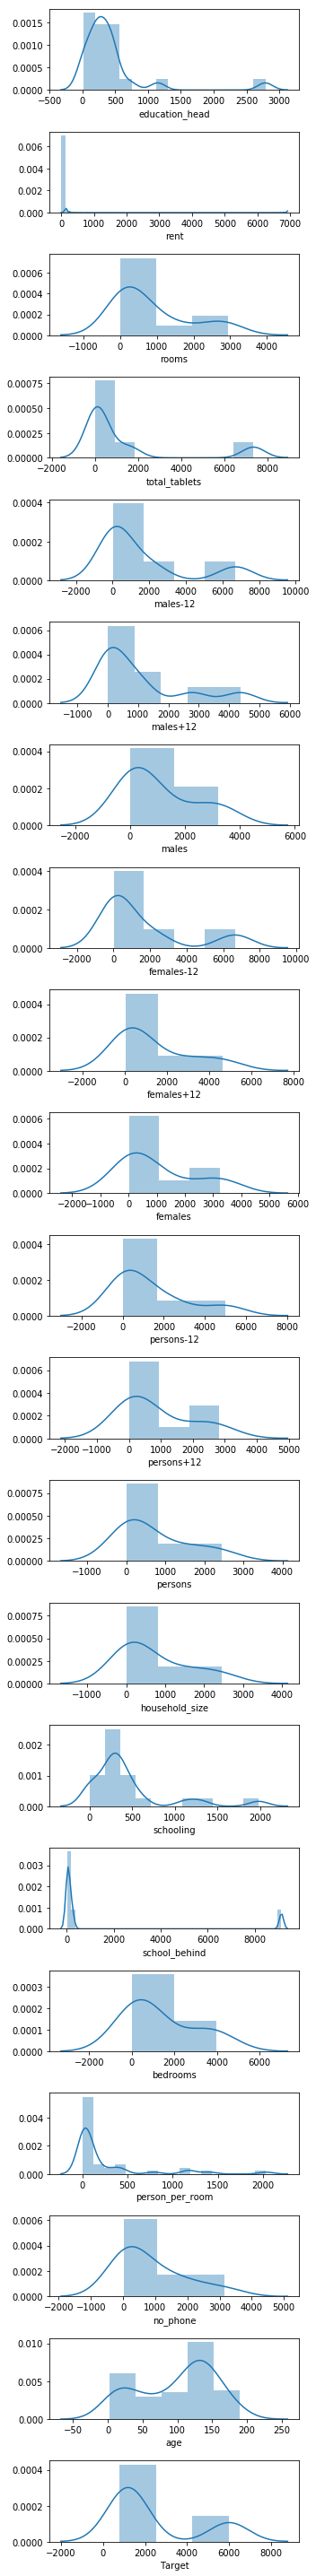

In [48]:
#distribution plot to see the trend in the data

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
all_cols = np.array(df.columns).take([0,1,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128,129])
fig, axes = plt.subplots(ncols=1,nrows = len(all_cols), figsize=(5,40))
for ax, col in zip(axes,all_cols ):
    sns.distplot(df[col].value_counts(), ax=ax)
    plt.tight_layout()
plt.show()

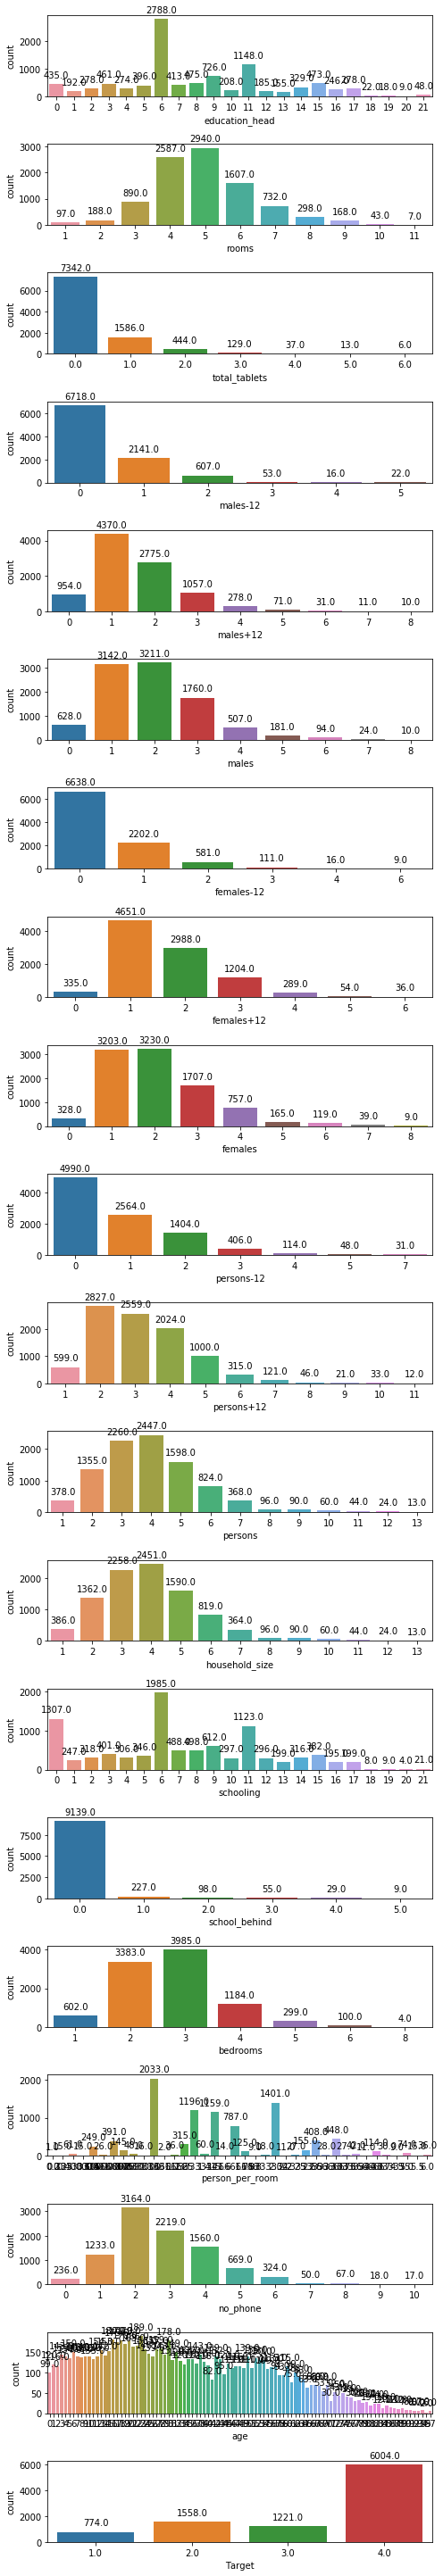

In [49]:
# barplot for frequenct in each category (wherever applicable)
all_cols = np.array(df.columns).take([0,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128,129])
fig, axes = plt.subplots(ncols=1,nrows = len(all_cols), figsize=(7,40))
for ax, col in zip(axes,all_cols ):
    splot = sns.barplot(df[col].value_counts().index,y=df[col].value_counts().values, ax=ax)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    plt.tight_layout()
    ax.set(xlabel=col, ylabel="count")
plt.show()

In [50]:
# Method to check skew and kurtosis for each column
def check_skew(df,all_cols):
    make_transform = pd.DataFrame(columns=["Column","Skew","Kurtosis"])
    index = 0
    avg_skew = 0
    for c in all_cols:
        
        skew = df.loc[:,[c]].skew().item()
        kurto = df.loc[:,[c]].kurtosis().item()
        avg_skew = avg_skew+skew
        make_transform = make_transform.append({"Column":c,"Skew":skew,"Kurtosis":kurto},ignore_index=True)
    return make_transform,avg_skew/len(all_cols)


In [51]:
all_cols = np.array(df.columns).take([0,1,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128])
make_transform,avg_skew = check_skew(df,all_cols)
print(make_transform)
print("Average Skew :",avg_skew)

             Column      Skew    Kurtosis
0    education_head  0.420878   -0.257342
1              rent  8.129282  139.940850
2             rooms  0.492808    0.956625
3     total_tablets  2.795130   10.157589
4          males-12  2.164806    6.627214
5          males+12  1.232271    3.297986
6             males  0.992957    1.874247
7        females-12  2.118286    6.515505
8        females+12  1.128747    1.896036
9           females  1.090578    1.816379
10       persons-12  1.763112    4.677718
11       persons+12  1.159647    2.734199
12          persons  1.158371    2.802964
13   household_size  1.160054    2.811473
14        schooling  0.192121   -0.666587
15    school_behind  6.794292   52.460006
16         bedrooms  0.670163    1.168976
17  person_per_room  1.889641    5.602881
18         no_phone  0.925919    1.670280
19              age  0.397156   -0.701564
Average Skew : 1.8338109960420805


In [52]:
# Skew values between [-0.5,0.5] are sysmetric and accepted
# skew values below -0.5 are negative skew 
# skew value above + are positive skew 
# using Logarithmic transformation to reduce the skew 

In [53]:
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def remove_skew(DF,include = None, threshold = 0.2):
    
    transform_master = pd.DataFrame(columns=["column","delta","lambda","skew_old","skew_new"])
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    
    def make_positive(series):
        minimum = np.amin(series)
        original = series[0]
        #If minimum is negative, offset all values by a constant to move all values to minimum positive 
        if minimum <= 0:
            series = series + abs(minimum) + 0.001
        delta = series[0]-original
        return series,delta
    
    #Go through desired columns in DataFrame
    
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()  #
        # If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        # Prefered transformation - CoxBox Transformation
        
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            
            #Make sure all values are positive
            
            DF[col],delta = make_positive(DF[col])    #
            
            DF[col],fitted_lambda = ss.boxcox(DF[col])   #
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col],delta = make_positive(DF[col])
   
            DF[col],fitted_lambda = ss.boxcox(DF[col]) #
            skew_new = DF[col].skew()
        #print("appending...",col,delta,fitted_lambda,skew,skew_new)
        
        transform_master = transform_master.append({"column":col,"delta":delta,"lambda":fitted_lambda,
                                                    "skew_old":skew,"skew_new":skew_new}
                                                        ,ignore_index=True)
    #print(transform_master)
    return DF,transform_master

In [54]:
df.head()

,education_head,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,Target
0,10,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4.0
1,12,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4.0
2,11,130000.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4.0
3,11,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4.0
4,11,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4.0


In [55]:
all_cols = np.array(df.columns).take([0,1,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128])

# Creating a dataframe to capture values of transformation (can be used later on test data)

df_transformed,transform_master = remove_skew(df,include=all_cols)
df_transformed.head()

,education_head,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,Target
0,5.093939,219.129496,0,1.639843,0,1,1,0,-82.564678,-34.19683,0.001000,0.001000,-31.126742,-1.68203,-1.729223,-8.067237,0.000000,0.000000,0.000000,1,10,-6.976378e+08,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0,10.0,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0.001000,1,0,0,0,0,0,1,0,12.448569,4.0
1,5.893981,193.406573,0,2.315815,0,1,1,1,0.000999,-34.19683,0.001000,0.001000,-31.126742,-1.68203,-1.729223,-8.067237,0.000000,0.000000,0.000000,1,12,-6.976378e+08,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12.0,0,0,0,0,0,0,0,1,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0.001000,1,0,0,0,0,0,1,0,16.361292,4.0
2,5.500923,190.755398,0,4.614030,0,1,1,0,-82.564678,-34.19683,-1.776735,-1.690715,-31.126742,0.00100,0.001000,-8.067237,0.000000,0.000000,0.000000,1,11,-6.976378e+08,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,11.0,0,0,0,0,1,0,0,0,0,0.825316,-0.681143,1,0,0,0,0,0,0,0,-1.615317,1,0,0,0,0,0,1,0,19.800443,4.0
3,5.500923,214.845980,0,2.940189,0,1,1,1,0.000999,-34.19683,0.844603,0.854176,0.000999,0.00100,0.849767,0.000999,1.256623,1.781296,1.782563,4,9,9.979474e-04,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,1,0,0,0,0,0,1.455125,0.289784,0,0,1,0,0,0,0,1,1.565382,1,0,0,0,0,0,1,0,6.771986,4.0
4,5.500923,214.845980,0,2.940189,0,1,1,1,0.000999,-34.19683,0.844603,0.854176,0.000999,0.00100,0.849767,0.000999,1.256623,1.781296,1.782563,4,11,-6.976378e+08,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,0,1,0,0,0,0,1.455125,0.289784,0,0,1,0,0,0,0,1,1.565382,1,0,0,0,0,0,1,0,11.323563,4.0


In [56]:
transform_master = transform_master.set_index("column")
transform_master

,delta,lambda,skew_old,skew_new
column,,,,
education_head,0.001,0.617609,0.420878,-0.422706
rent,0.001,0.360519,8.129282,0.934633
rooms,0.000,0.686281,0.492808,0.076578
total_tablets,0.001,-0.557443,2.795130,1.271626
males-12,0.001,-0.383071,2.164806,0.888693
males+12,0.001,0.550252,1.232271,-0.406150
males,0.001,0.580759,0.992957,-0.285741
females-12,0.001,-0.363458,2.118286,0.845438
females+12,0.001,0.583996,1.128747,0.005394


In [57]:
all_cols = np.array(df.columns).take([0,1,3,8,9,10,11,12,13,14,15,16,17,18,20,21,109,110,119,128])
make_transform,avg_skew = check_skew(df_transformed,all_cols)
print(make_transform)
print("Average Skew :",avg_skew)

             Column      Skew   Kurtosis
0    education_head -0.422706   0.362717
1              rent  0.934633  15.567970
2             rooms  0.076578   0.944505
3     total_tablets  1.271626  -0.382944
4          males-12  0.888693  -1.209973
5          males+12 -0.406150   0.882054
6             males -0.285741   0.850285
7        females-12  0.845438  -1.284863
8        females+12  0.005394   1.218325
9           females -0.043391   0.931539
10       persons-12  0.105474  -1.965718
11       persons+12  0.001707   0.087683
12          persons  0.022388   0.506459
13   household_size  0.022365   0.505791
14        schooling  0.192121  -0.666587
15    school_behind  4.462693  17.919376
16         bedrooms  0.019526   0.405343
17  person_per_room  0.005955   0.743692
18         no_phone -0.043459   0.969359
19              age -0.242705  -0.636200
Average Skew : 0.3705219955175144


In [58]:
final_df = df_transformed.copy(deep=True)
final_df["Target"].unique()

array([4., 2., 3., 1.])

In [59]:
target = final_df.loc[:,["Target"]]
features = final_df.drop(["Target"],axis = 1)
features.drop(["household_identifier"],axis = 1,inplace=True)
target.shape,features.shape

((9557, 1), (9557, 128))

# [9] Estimate the scores from the model using Cross Validation

In [60]:
# Using Cross Validation for all the features in the data set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,features,target,cv=10)
print("Expected score that can be achieved from the dataset: ",np.max(scores))
print("Average Score Expected: ", np.average(scores))

Expected score that can be achieved from the dataset:  0.694240837696335
Average Score Expected:  0.6120657519480673


In [61]:
# Stratified Cross Validation to check expected performace/accuracy of the model 

from sklearn.model_selection import StratifiedShuffleSplit

#n_splits should be equal to no of cv value in cross_val_score
ss = StratifiedShuffleSplit(n_splits=10, random_state=1,test_size=0.2)

i=0
for train,test in ss.split(features,target):
    #print("train = :",train,"test = :",test)
    i = i+1
    X_train,X_test = features.iloc[train],features.iloc[test]
    y_train,y_test = target.iloc[train],target.iloc[test]
    
    model.fit(X_train,y_train)
    
    if model.score(X_test,y_test) >= 0.90:
        print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(X_test,y_test),model.score(X_train,y_train),i))
        

Test Score: 0.9246861924686193, train score: 0.9989535644211903, for Sample Split: 1
Test Score: 0.9320083682008368, train score: 0.9988227599738391, for Sample Split: 2
Test Score: 0.9377615062761506, train score: 0.9984303466317854, for Sample Split: 3
Test Score: 0.9173640167364017, train score: 0.9988227599738391, for Sample Split: 4
Test Score: 0.9346234309623431, train score: 0.9984303466317854, for Sample Split: 5
Test Score: 0.9325313807531381, train score: 0.9977763243950294, for Sample Split: 6
Test Score: 0.9189330543933054, train score: 0.998168737737083, for Sample Split: 7
Test Score: 0.9414225941422594, train score: 0.9989535644211903, for Sample Split: 8
Test Score: 0.9361924686192469, train score: 0.9990843688685416, for Sample Split: 9
Test Score: 0.926255230125523, train score: 0.9982995421844343, for Sample Split: 10


In [62]:
# Target value -  Target is already in form of labels [1,2,3,4]
# Feature values - 
#                   * categorical values are all hot encoded values
#                   * Numeric values are transformed to reduced skew and a average skew of 0.40 for the feature columns 
#                   * After transformation the numerical values are also standardized using Z score to bring them to 
#                     ranged values 

# Algorithm ( Classifier )- Random Forest Classifer 

In [63]:
# Finding best features for the Random Forest CLassifer model
# Method 1 : Correlation with Target variable
# Method 2 : Recursive Feature ELimination
# Method 3 : Anova 
# Method 4 : Select by Model

In [64]:
final_df.head()

,education_head,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,Target
0,5.093939,219.129496,0,1.639843,0,1,1,0,-82.564678,-34.19683,0.001000,0.001000,-31.126742,-1.68203,-1.729223,-8.067237,0.000000,0.000000,0.000000,1,10,-6.976378e+08,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0,10.0,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0.001000,1,0,0,0,0,0,1,0,12.448569,4.0
1,5.893981,193.406573,0,2.315815,0,1,1,1,0.000999,-34.19683,0.001000,0.001000,-31.126742,-1.68203,-1.729223,-8.067237,0.000000,0.000000,0.000000,1,12,-6.976378e+08,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12.0,0,0,0,0,0,0,0,1,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0.001000,1,0,0,0,0,0,1,0,16.361292,4.0
2,5.500923,190.755398,0,4.614030,0,1,1,0,-82.564678,-34.19683,-1.776735,-1.690715,-31.126742,0.00100,0.001000,-8.067237,0.000000,0.000000,0.000000,1,11,-6.976378e+08,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,11.0,0,0,0,0,1,0,0,0,0,0.825316,-0.681143,1,0,0,0,0,0,0,0,-1.615317,1,0,0,0,0,0,1,0,19.800443,4.0
3,5.500923,214.845980,0,2.940189,0,1,1,1,0.000999,-34.19683,0.844603,0.854176,0.000999,0.00100,0.849767,0.000999,1.256623,1.781296,1.782563,4,9,9.979474e-04,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,1,0,0,0,0,0,1.455125,0.289784,0,0,1,0,0,0,0,1,1.565382,1,0,0,0,0,0,1,0,6.771986,4.0
4,5.500923,214.845980,0,2.940189,0,1,1,1,0.000999,-34.19683,0.844603,0.854176,0.000999,0.00100,0.849767,0.000999,1.256623,1.781296,1.782563,4,11,-6.976378e+08,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11.0,0,0,0,0,1,0,0,0,0,1.455125,0.289784,0,0,1,0,0,0,0,1,1.565382,1,0,0,0,0,0,1,0,11.323563,4.0


In [65]:
# Method 1 - Correlation  
final_df_corr = pd.concat([features,target],axis = 1).corr()
final_df_corr[-1:].transpose().sort_values(by="Target",ascending=False)[:20]

,Target
Target,1.000000
education_avg_18+,0.337525
education_head,0.323887
ceiling_yes,0.308430
schooling,0.308104
floor_good,0.295613
wall_good,0.292459
floor_mct,0.283028
material_brick,0.262568
roof_good,0.258273


 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - LOOPS</span></h2>

In [67]:
# selecting features with > 0.2 correlation with target

selFeatures1 = ["education_avg_18+","education_head","ceiling_yes","schooling","floor_good","wall_good","floor_mct","material_brick","roof_good",
        "tablet","total_tablets","rooms","no_phone","education_ug+"]

feat1 = features[selFeatures1]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
perf1 = []
for randomState in range(len(final_df)):
    
    X_train,X_test,y_train,y_test = train_test_split(feat1,target,test_size = .2,random_state = randomState )
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    #if test_score > train_score:
    #print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    perf1.append([test_score,train_score,randomState])
perf1.sort(reverse=True)
perf1[:10]

[[0.8959205020920502, 0.9832570307390451, 9356],
 [0.8948744769874477, 0.9828646173969915, 6452],
 [0.8948744769874477, 0.9824722040549378, 5136],
 [0.891213389121339, 0.9828646173969915, 2038],
 [0.8891213389121339, 0.9836494440810988, 3863],
 [0.8891213389121339, 0.9807717462393721, 5565],
 [0.8885983263598326, 0.9845650752125572, 6389],
 [0.8885983263598326, 0.9837802485284499, 3463],
 [0.8880753138075314, 0.9833878351863964, 3287],
 [0.8880753138075314, 0.9822105951602355, 245]]

In [68]:
# The corelation method DOES NOT provide any generalized model.- [0.8938284518828452, 0.9820797907128842, 8546]

In [65]:
#Method 2 - Using RFE - Recursive Feature Elimination
from sklearn.ensemble import RandomForestClassifier
modelForRFE = RandomForestClassifier()

# 2. Apply RFE on model
from sklearn.feature_selection import RFE

#estimator contains the algorithm model object
features_rfe = RFE(estimator= modelForRFE,step=1)

features_rfe.fit(features,target)

#3. Check Feature Ranks

rank = features_rfe.ranking_

In [66]:
ones = np.array(np.where(rank==1))
selFeatures2 = np.array(features.columns[ones])
selFeatures2 = selFeatures2.flatten()
feat2 = features.loc[:,selFeatures2].values

 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - LOOPS</span></h2>

In [71]:
#feat2 = features.loc[:,selFeatures].values
perf2 = []
for randomState in range(len(final_df)):
    X_train,X_test,y_train,y_test = train_test_split(feat2,target,test_size = .2,random_state = randomState )
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    #if test_score > train_score:
    #print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    perf2.append([test_score,train_score,randomState])
perf2.sort(reverse=True)
perf2[:10]

[[0.9743723849372385, 0.999345977763244, 7440],
 [0.9743723849372385, 0.9988227599738391, 8837],
 [0.9738493723849372, 0.9997383911052976, 453],
 [0.9738493723849372, 0.9992151733158927, 4682],
 [0.9728033472803347, 0.9992151733158927, 9521],
 [0.9728033472803347, 0.9992151733158927, 7491],
 [0.9722803347280334, 0.9997383911052976, 6730],
 [0.9722803347280334, 0.999345977763244, 1944],
 [0.9722803347280334, 0.999345977763244, 589],
 [0.9722803347280334, 0.9992151733158927, 4860]]

In [66]:
# The RFE method DOES NOT provide any generalized model.- [0.9764644351464435, 0.999345977763244, 7440]

In [67]:
from sklearn.feature_selection import  SelectPercentile
#from sklearn.feature_selection import f_regression #This is for regression algo
from sklearn.feature_selection import f_classif  #This is for classification algo

features_anova = SelectPercentile(percentile=50, score_func=f_classif)

features_anova.fit(features,target)

#(features.columns)
support = features_anova.get_support()
ones = np.array(np.where(support==True))
selFeatures3 = np.array(features.columns[ones])
selFeatures3 = selFeatures3.flatten()
feat3 = features.loc[:,selFeatures3].values

 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - LOOPS</span></h2>

In [74]:

perf3 = []
for randomState in range(len(df)):
    
    X_train,X_test,y_train,y_test = train_test_split(feat3,target,test_size = .2,random_state = randomState )
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    #if test_score > train_score:
        #print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    perf3.append([test_score,train_score,randomState])
        
perf3.sort(reverse=True)
perf3[:10]

[[0.9738493723849372, 0.9992151733158927, 8546],
 [0.9680962343096234, 0.9985611510791367, 3097],
 [0.9654811715481172, 0.9994767822105951, 5141],
 [0.9654811715481172, 0.9992151733158927, 4564],
 [0.9649581589958159, 0.9989535644211903, 6531],
 [0.9644351464435147, 0.9992151733158927, 8892],
 [0.9639121338912134, 0.9985611510791367, 8763],
 [0.9639121338912134, 0.9982995421844343, 5841],
 [0.9633891213389121, 0.9990843688685416, 8707],
 [0.9633891213389121, 0.9986919555264879, 256]]

In [68]:
# The Anova method does not provide any generalized model.- [0.9680962343096234, 0.999345977763244, 2141]

In [68]:
from sklearn.feature_selection import SelectFromModel
features_model = SelectFromModel(RandomForestClassifier())

features_model.fit(features,target)

#Get the support
support = features_model.get_support()
ones = np.array(np.where(support==True))
selFeatures4 = np.array(features.columns[ones])
selFeatures4 = selFeatures4.flatten()
feat4 = features.loc[:,selFeatures4].values

 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - LOOPS</span></h2>

In [77]:

perf4 = []
for randomState in range(len(df)):
    
    X_train,X_test,y_train,y_test = train_test_split(feat4,target,test_size = .2,random_state = randomState )
    
    model =RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    #if test_score > train_score:
        #print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    perf4.append([test_score,train_score,randomState])
        
perf4.sort(reverse=True)
perf4[:10]

[[0.9738493723849372, 0.9988227599738391, 9226],
 [0.9717573221757322, 0.999345977763244, 2941],
 [0.9712343096234309, 0.9989535644211903, 4687],
 [0.9712343096234309, 0.9986919555264879, 9356],
 [0.9707112970711297, 0.9990843688685416, 9515],
 [0.9696652719665272, 0.9992151733158927, 8376],
 [0.9696652719665272, 0.9988227599738391, 5300],
 [0.9686192468619247, 0.9994767822105951, 9098],
 [0.9686192468619247, 0.999345977763244, 6870],
 [0.9686192468619247, 0.9992151733158927, 1167]]

In [70]:
# The Select by Model method DOES NOT provide any generalized model.- [0.9701882845188284, 0.9988227599738391, 8123]

# No model are generalized hence chossing the best model amongst them for tuning the hyperparameters to get the desired model
# Selecting features selected by RFE for model tuning as its test accuracy is maximum
    # [Test score,Train Score, Random State] : [0.9764644351464435,0.999345977763244, 7440]

 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - LOOPS</span></h2>

In [70]:
# Iterating over 
from sklearn.model_selection import train_test_split
perf_depth = []

X_train,X_test,y_train,y_test = train_test_split(feat2,target,test_size = .2,random_state = 7440 )
for i in range(100):
    for d in range(2,30):
        model = RandomForestClassifier(max_depth = d,random_state=i)
        model.fit(X_train,y_train)

        train_score = model.score(X_train,y_train)
        test_score = model.score(X_test,y_test)

        if test_score > train_score:
        #print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
            perf_depth.append([test_score,train_score,d,i])
perf_depth.sort(reverse=True)
perf_depth[:10]

[[0.7405857740585774, 0.7393067364290385, 7, 99],
 [0.7405857740585774, 0.7386527141922825, 7, 95],
 [0.7311715481171548, 0.7306736429038587, 7, 67],
 [0.7233263598326359, 0.7196860693263571, 6, 96],
 [0.7160041841004184, 0.7139306736429039, 6, 10],
 [0.7154811715481172, 0.7152387181164159, 6, 31],
 [0.7149581589958159, 0.7143230869849575, 6, 75],
 [0.7149581589958159, 0.7136690647482015, 6, 84],
 [0.7149581589958159, 0.7123610202746894, 6, 51],
 [0.7144351464435147, 0.7110529758011772, 6, 2]]

In [71]:
# [0.7463389121338913, 0.7449313276651406, 7, 89] - i = 100,d= 2-30

# [10] Predict the accuracy using random forest classifier.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feat2,target,test_size = .2,random_state = 7440 )
model = RandomForestClassifier(max_depth=7,random_state=89)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
train_score,test_score

(0.7438848920863309, 0.7306485355648535)

In [70]:
# Checking model performance with Cross Validation for features selected by RFE method
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,feat2,target,cv=10)
print("Expected score that can be achieved using selected features from the dataset: ",np.max(scores))
print("Average Score Expected: ", np.average(scores))

Expected score that can be achieved using selected features from the dataset:  0.6572622779519331
Average Score Expected:  0.5869490723661832


In [71]:
# Score for selected features are also similar
# Using Hyperparameter tuning to get better results

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [82]:
# Creating a hyperparameter tuned model (hpt) and saving it as a pickel file

hpt_model = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid, 
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               n_jobs = 3)
hpt_model

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

 <h2><span style="color:red">Takes a lot of time to execute (Do not run unless neccessary) - GRID SEARCH</span></h2>

In [83]:
#import pickle
from datetime import datetime
#now = str(datetime.now().strftime("%Y-%m-%d-%H-%M-%S"))

final_model_LAIC = final_model_LAIC.fit(X_train, y_train)

# #dumping the model
# file_model = str(str('models/LAIC_')+now+'.pkl')
# with open(file_model,'wb') as final_model:
#     pickle.dump(final_model_LAIC,final_model)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  5.1min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 22.6min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 40.7min finished


In [84]:
# #loading the model
# import pickle
# pkl_file = open('models/LAIC_2019-12-04-11-35-47.pkl', 'rb')
# final_model_LAIC = pickle.load(pkl_file)
# final_model_LAIC

In [85]:
train_score = final_model_LAIC.score(X_train,y_train)
test_score = final_model_LAIC.score(X_test,y_test)
y_pred = final_model_LAIC.predict(X_test)
train_score,test_score

(1.0, 0.9806485355648535)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cm)
print(cr)

[[ 149    1    1    3]
 [   1  287    0   10]
 [   1    3  211   11]
 [   2    2    2 1228]]
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       154
         2.0       0.98      0.96      0.97       298
         3.0       0.99      0.93      0.96       226
         4.0       0.98      1.00      0.99      1234

   micro avg       0.98      0.98      0.98      1912
   macro avg       0.98      0.96      0.97      1912
weighted avg       0.98      0.98      0.98      1912



# The model metrics:
                    Train Score  : 98.11%
                     Test Score  : 100%
       Precision for each class  : >97%
          Recall for each class  : >93%


# --------------------------------------------------------------------------------------------------------------
# Developing the RandomForestClassifier model - DONE
# --------------------------------------------------------------------------------------------------------------

In [87]:
print("time taken to build the model :",perf_counter()-start)

time taken to build the model : 2979.6072146819997


# *-----------------------------------------------------------------------------------------------------------
# * * The term "Test" used above in the code stands for VALIDATION DATA.     
# * * The actual testing value for which the prediction from the model has to    
#     be made will be loaded                                                                                      
# *-----------------------------------------------------------------------------------------------------------

# * [12] Predict values for Test data (data without Target Value ie "test.csv".)

In [88]:
# Focus on the following columns are they are only need to make the predcition from the model, rest fo the columns 
# need not be loaded
selFeatures2

array(['education_head', 'rent', 'rooms', 'tablet', 'total_tablets',
       'males-12', 'males+12', 'males', 'females-12', 'females+12',
       'females', 'persons-12', 'persons+12', 'persons', 'household_size',
       'household_persons', 'schooling', 'material_brick',
       'material_other', 'material_cement', 'owall_wood', 'floor_mct',
       'floor_cement', 'floor_wood', 'ceiling_yes', 'electricity_comp',
       'electricity_coop', 'toilet_sewer', 'toilet_tank', 'cooking_elec',
       'cooking_gas', 'cooking_wood', 'rubbish_truck', 'rubbish_burn',
       'walls_bad', 'walls_regular', 'wall_good', 'roof_bad',
       'roof_regular', 'roof_good', 'floor_bad', 'floor_regular',
       'floor_good', 'household_no_children', 'household_no_adults',
       'household_no_65+', 'household_no_total',
       'household_dependent_rate', 'education_avg_18+', 'bedrooms',
       'person_per_room', 'house_own', 'house_rented', 'house_borrowed',
       'tv', 'no_phone', 'region_central', 'region_cho

# 1) Loading the test data

In [89]:
file_test = "test.csv"
raw_test = pd.read_csv(file_test)
raw_test.shape

(23856, 142)

# 2) Rename labels

In [90]:
labels_file = "labels.csv"
labels = pd.read_csv(labels_file)
labels = labels.transpose()
raw_test.columns = np.array(labels).flatten()[:-1]

# 3) Make neccessary changes to the existing columns :
  a) map dependency rate b) assign household head

In [91]:
# converting non numeric values from household_dependent_rate to numeric values
dd = {"yes":1,"no":0}
raw_test["household_dependent_rate"] = raw_test["household_dependent_rate"].map(dd).fillna(raw_test["household_dependent_rate"])

In [92]:
# finding and set household head if not avialable 
groupby_head_test = list(raw_test.groupby(raw_test['household_identifier']))
raw_test,_,_ = findandSet_household_change_head(raw_test,groupby_head_test)
raw_test.head()

,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [93]:
groupby_head_test = list(raw_test.groupby(raw_test['household_identifier']))
raw_test = find_education_head(raw_test,groupby_head_test)
raw_test.head()

,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,education_head
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16,17
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681,17
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681,17
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481,16
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324,11


# 4) Select only features required for model, drop others

In [94]:
test_df = raw_test.loc[:,selFeatures2]
test_df.head()

,education_head,rent,rooms,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,material_brick,material_other,material_cement,owall_wood,floor_mct,floor_cement,floor_wood,ceiling_yes,electricity_comp,electricity_coop,toilet_sewer,toilet_tank,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_burn,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,bedrooms,person_per_room,house_own,house_rented,house_borrowed,tv,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_urbana,region_rural,age
0,17,NaN,5,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,4
1,17,NaN,5,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
2,17,NaN,5,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
3,16,NaN,14,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,16.0,1,1.0,1,0,0,0,2,1,0,0,0,0,1,0,59
4,11,175000.0,4,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,8,NaN,2,0.5,0,1,0,0,1,1,0,0,0,0,1,0,18


# 5) Fill empty values (NaN values)

In [95]:
nv = test_df.isnull().sum()
nv[nv > 0]

rent                 17403
total_tablets        18126
education_avg_18+       31
dtype: int64

In [96]:
# Condtions for no rent
test_df.loc[((test_df["house_own"]==1) | (test_df["house_borrowed"]==1)),"rent"] = 0

# taking median values from train data as we cannot use test data median(supposed to be future/unseen data)

median_rent_test = median_rent
median_edu_avg18_test = median_edu_avg18

median_rent_test,median_edu_avg18_test

(130000.0, 9.0)

In [97]:
test_df["rent"] = test_df["rent"].fillna(median_rent_test)
test_df["total_tablets"] = test_df["total_tablets"].fillna(0)
test_df["education_avg_18+"] = test_df["education_avg_18+"].fillna(median_edu_avg18_test)
test_df.head()

,education_head,rent,rooms,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,material_brick,material_other,material_cement,owall_wood,floor_mct,floor_cement,floor_wood,ceiling_yes,electricity_comp,electricity_coop,toilet_sewer,toilet_tank,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_burn,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,bedrooms,person_per_room,house_own,house_rented,house_borrowed,tv,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_urbana,region_rural,age
0,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,4
1,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
2,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
3,16,0.0,14,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,16.0,1,1.0,1,0,0,0,2,1,0,0,0,0,1,0,59
4,11,175000.0,4,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,8,9.0,2,0.5,0,1,0,0,1,1,0,0,0,0,1,0,18


In [98]:
# Checking if there are any null values present
nv = test_df.isnull().sum()
nv[nv > 0]

Series([], dtype: int64)

In [99]:
# All features have relavant values 

In [100]:
edu_head = raw_test["education_head"]
raw_test.drop(["education_head"],axis=1,inplace=True)
raw_test.insert(0,"education_head",edu_head)
raw_test.head()

,education_head,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,17,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,17,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,17,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,16,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,11,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


#  6) Select neccessary features and make transformations

In [101]:
transform_master

,delta,lambda,skew_old,skew_new
column,,,,
education_head,0.001,0.617609,0.420878,-0.422706
rent,0.001,0.360519,8.129282,0.934633
rooms,0.000,0.686281,0.492808,0.076578
total_tablets,0.001,-0.557443,2.795130,1.271626
males-12,0.001,-0.383071,2.164806,0.888693
males+12,0.001,0.550252,1.232271,-0.406150
males,0.001,0.580759,0.992957,-0.285741
females-12,0.001,-0.363458,2.118286,0.845438
females+12,0.001,0.583996,1.128747,0.005394


In [102]:
test_df.columns 

Index(['education_head', 'rent', 'rooms', 'tablet', 'total_tablets',
       'males-12', 'males+12', 'males', 'females-12', 'females+12', 'females',
       'persons-12', 'persons+12', 'persons', 'household_size',
       'household_persons', 'schooling', 'material_brick', 'material_other',
       'material_cement', 'owall_wood', 'floor_mct', 'floor_cement',
       'floor_wood', 'ceiling_yes', 'electricity_comp', 'electricity_coop',
       'toilet_sewer', 'toilet_tank', 'cooking_elec', 'cooking_gas',
       'cooking_wood', 'rubbish_truck', 'rubbish_burn', 'walls_bad',
       'walls_regular', 'wall_good', 'roof_bad', 'roof_regular', 'roof_good',
       'floor_bad', 'floor_regular', 'floor_good', 'household_no_children',
       'household_no_adults', 'household_no_65+', 'household_no_total',
       'household_dependent_rate', 'education_avg_18+', 'bedrooms',
       'person_per_room', 'house_own', 'house_rented', 'house_borrowed', 'tv',
       'no_phone', 'region_central', 'region_chorotega'

In [103]:
def make_transformation(df,mapping = transform_master):
    
    for i in range(len(mapping)):
        col = mapping.index[i]
        if col in test_df.columns:
            delta,lamda,_,_ = mapping.loc[col]
            test_df.loc[:,[col]] = (np.power((test_df.loc[:,[col]]+delta),lamda)-1)/lamda
        
    return df

In [104]:
# Making a copy for non transformed data
test_df_trans = test_df.copy(deep=True)

test_df_trans = make_transformation(test_df_trans)
test_df_trans.head()

,education_head,rent,rooms,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,material_brick,material_other,material_cement,owall_wood,floor_mct,floor_cement,floor_wood,ceiling_yes,electricity_comp,electricity_coop,toilet_sewer,toilet_tank,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_burn,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,bedrooms,person_per_room,house_own,house_rented,house_borrowed,tv,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_urbana,region_rural,age
0,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,4
1,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
2,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41
3,16,0.0,14,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,16.0,1,1.0,1,0,0,0,2,1,0,0,0,0,1,0,59
4,11,175000.0,4,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,8,9.0,2,0.5,0,1,0,0,1,1,0,0,0,0,1,0,18


# 7) Make predictions

In [106]:
# Loading the final model

# #loading the model
# pkl_file = open(file_model, 'rb')
# final_model_LAIC = pickle.load(pkl_file)
final_model_LAIC

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=89, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=2,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [107]:
predY_test_df_trans = final_model_LAIC.predict(test_df_trans)


In [108]:
# Count of each target value 
pd.Series(predY_test_df_trans).value_counts()

4.0    20227
2.0     1964
3.0     1289
1.0      376
dtype: int64

In [109]:
# Adding a column for the predicted values for the Poverty Level of each individual in the test data (transformed data)
test_df_trans["Predicted Target"] = pd.Series(predY_test_df_trans)
test_df_trans.head()

,education_head,rent,rooms,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,material_brick,material_other,material_cement,owall_wood,floor_mct,floor_cement,floor_wood,ceiling_yes,electricity_comp,electricity_coop,toilet_sewer,toilet_tank,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_burn,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,bedrooms,person_per_room,house_own,house_rented,house_borrowed,tv,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_urbana,region_rural,age,Predicted Target
0,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,4,4.0
1,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41,4.0
2,17,0.0,5,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,2,1.5,1,0,0,0,2,1,0,0,0,0,1,0,41,4.0
3,16,0.0,14,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,16.0,1,1.0,1,0,0,0,2,1,0,0,0,0,1,0,59,4.0
4,11,175000.0,4,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,8,9.0,2,0.5,0,1,0,0,1,1,0,0,0,0,1,0,18,4.0


In [110]:
# Adding a column for the predicted values for the Poverty Level of each individual in the test data (untransformed data)
test_df["Predicted Target"] = pd.Series(predY_test_df_trans)
test_df.head()

,education_head,rent,rooms,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,material_brick,material_other,material_cement,owall_wood,floor_mct,floor_cement,floor_wood,ceiling_yes,electricity_comp,electricity_coop,toilet_sewer,toilet_tank,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_burn,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_avg_18+,bedrooms,person_per_room,house_own,house_rented,house_borrowed,tv,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_urbana,region_rural,age,Predicted Target
0,7.697047,-2.543890,2.940189,0,-82.564678,0.000999,0.001000,0.854176,-31.126742,0.00100,0.001000,0.000999,0.753973,1.337956,1.338699,3,-2.867798,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,0.825316,0.409649,1,0,0,0,0.863455,1,0,0,0,0,1,0,2.073307,4.0
1,7.697047,-2.543890,2.940189,0,-82.564678,0.000999,0.001000,0.854176,-31.126742,0.00100,0.001000,0.000999,0.753973,1.337956,1.338699,3,4.673128,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,0.825316,0.409649,1,0,0,0,0.863455,1,0,0,0,0,1,0,12.081986,4.0
2,7.697047,-2.543890,2.940189,0,-82.564678,0.000999,0.001000,0.854176,-31.126742,0.00100,0.001000,0.000999,0.753973,1.337956,1.338699,3,4.834239,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,2,0,3,.5,16.5,0.825316,0.409649,1,0,0,0,0.863455,1,0,0,0,0,1,0,12.081986,4.0
3,7.354697,-2.543890,7.456695,1,0.000999,-34.196830,0.001000,0.001000,-31.126742,-1.68203,-1.729223,-8.067237,0.000000,0.000000,0.000000,1,4.673128,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,16.0,0.000000,0.000000,1,0,0,0,0.863455,1,0,0,0,0,1,0,15.141003,4.0
4,5.500923,212.646988,2.315815,1,0.000999,-34.196830,-1.776735,-1.690715,-31.126742,0.00100,0.001000,-8.067237,0.000000,0.000000,0.000000,1,3.749516,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,8,9.0,0.825316,-0.681143,0,1,0,0,0.001000,1,0,0,0,0,1,0,7.044724,4.0


In [111]:
# Adding a column for the predicted values for the Poverty Level of each individual in the test data (orignal test data)
raw_test["Predicted Target"] = pd.Series(predY_test_df_trans)
raw_test.head()

,education_head,id,rent,overcrowd_bedroom,rooms,overcrowd_room,bathroom,refrigerator,tablet,total_tablets,males-12,males+12,males,females-12,females+12,females,persons-12,persons+12,persons,household_size,household_persons,schooling,school_behind,household_size1,material_brick,material_other,material_cement,owall_waste,owall_wood,owall_zink,owall_natural,owall_other,floor_mct,floor_cement,floor_other,floor_natural,floor_no,floor_wood,roof_foil,roof_cement,roof_natual,other_material,ceiling_yes,dwell_in_water,dwell_out_water,provision_water_no,electricity_comp,electricity_private,electricity_no,electricity_coop,toilet_inside_no,toilet_sewer,toilet_tank,toilet_hole,toilet_other,cooking_no,cooking_elec,cooking_gas,cooking_wood,rubbish_truck,rubbish_buried,rubbish_burn,rubbish_unoccupied,rubbish_river,rubbish_other,walls_bad,walls_regular,wall_good,roof_bad,roof_regular,roof_good,floor_bad,floor_regular,floor_good,disable_yes,gender_male,gender_female,status_10,status_free,status_married,status_divorced,status_separted,status_widowed,status_single,household_head,household_partner,household_child,household_stepchid,household_inlwas_child,household_gchild,household_parents,household_inlwas_parent,household_sibling,household_inlwas_sibling,household_other,household_nonfamily,household_identifier,household_no_children,household_no_adults,household_no_65+,household_no_total,household_dependent_rate,education_head_male,education_head_female,education_avg_18+,education_no,education_primary_no,education_primary_yes,education_secondary_no,education_secondary_yes,education_tech_no,education_tech_yes,education_ug+,education_pg+,bedrooms,person_per_room,house_own,house_installment,house_rented,house_precarious,house_borrowed,pc,tv,phones,no_phone,region_central,region_chorotega,region_pfc,region_brunca,region_huetar,region_norte,region_urbana,region_rural,age,schooling_sq,age_sq,SQBhogar,SQBedjefe,SQBhogar,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Predicted Target
0,17,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16,4.0
1,17,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681,4.0
2,17,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681,4.0
3,16,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481,4.0
4,11,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324,4.0


In [113]:
#print("Total time taken : ",perf_counter-start)

# $

# $$$

# Conclusion from the Modelling process